*"Using two-photon population Ca2+ imaging, we recorded responses from 8,388 cells (in 72 record- ing fields across 32 retinae) in the ganglion cell layer (GCL) of the isolated mouse retina"*


*"Our stimulus movie consisted of 113 movie clips, each 150 frames (= 5 s) long. 108 clips were randomly reordered for each recording and split into two 54 clips-long training sequences (2 x 8100 = 16200 frames). The remaining 5 clips (750 frames) formed a fixed test sequence that was presented before, in between, and after the training sequences "*

For neural data:
"time-lapsed 64x64 pixel 755 image scans ($\approx(100 \mu m)^2$) at 7.8125 Hz"

Firing rate predictions in training use an input duration of 50 frames only (30 frames initial context and than 20 more).

In [1]:
import pickle
import pprint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from openretina.dataloaders import (
    MovieDataSet,
    MovieSampler,
    dataloaders_from_dictionaries,
)
from openretina.misc import CustomPrettyPrinter
from openretina.plotting import (
    play_sample_batch,
    play_stimulus,
    undo_video_normalization,
)

%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
!ls /Data/MouseCamCorrected/left

MC2_test_rgb_cropped_left-new.tif   RandomSequences.txt    train_18x16.npy
MC2_train_rgb_cropped_left-new.tif  test_18x16.npy
RandomSequences.npy		    test_18x16_backup.npy


In [3]:
left_movie_train = np.load("/Data/MouseCamCorrected/left/train_18x16.npy")
left_movie_test = np.load("/Data/MouseCamCorrected/left/test_18x16.npy")
all_left_movies = np.concatenate([left_movie_train, left_movie_test], axis=1)

green_mean = np.mean(all_left_movies[0])
green_std = np.std(all_left_movies[0])

uv_mean = np.mean(all_left_movies[1])
uv_std = np.std(all_left_movies[1])

In [4]:
!ls /Data/fd_export

dataloaders_stim_8c18928_responses_99c71a0.pkl	movies_8c18928.pkl
dataloaders_stim_c285329_responses_0698360.pkl	movies_c285329.pkl
dataloaders_stim_c285329_responses_483c12d.pkl


## Import data

The movies dictionary contains for each eye 19 train movies (one for each of the random re-orderings), 1 validation movie and 1 test movie. 

The `start_indices` field in each session specifies from where in the train movie the validation data was taken, and makes sure that the dataloader does not reload chunks of the train movies used in validation during training.

In [6]:
stim_dataloaders_dict = pickle.load(
    open("/Data/fd_export/dataloaders_stim_8c18928_responses_99c71a0.pkl", "rb")
)
movies_dict = pickle.load(open("/Data/fd_export/movies_8c18928.pkl", "rb"))

dataloaders = dataloaders_from_dictionaries(stim_dataloaders_dict, movies_dict)

In [13]:
pp = CustomPrettyPrinter(indent=4)

pp.pprint(stim_dataloaders_dict["test"])

{   '1_ventral1_20210929': {   'chunk_size': 750,
                               'extra_info': {   'date': '2021-09-29',
                                                 'exp_num': 1,
                                                 'experimenter': 'Szatko',
                                                 'field_id': 1,
                                                 'stim_id': 5},
                               'eye': 'left',
                               'group_assignment': numpy.ndarray(shape=(86,)),
                               'responses': {   'avg': torch.Tensor(shape=[750, 86]),
                                                'by_trial': torch.Tensor(shape=[86, 3, 750])},
                               'roi_coords': torch.Tensor(shape=[86, 2]),
                               'roi_ids': numpy.ndarray(shape=(86,)),
                               'scan_sequence_idx': 8,
                               'split': 'test',
                               'start_indices': [0],
       

In [127]:
sample_field = "1_ventral1_20210929"
sample_dataloader = dataloaders["train"][sample_field]
sample_dataset = sample_dataloader.dataset

In [128]:
# Each re-ordered movie is normalised
print(sample_dataset.movies.mean())
print(sample_dataset.movies.std())

tensor(-0.0089)
tensor(0.9989)


In [130]:
sample_batch[1].shape

torch.Size([32, 150, 86])

In [131]:
sample_batch[0][0].mean()

tensor(-0.0875)

In [132]:
sample_batch[0][0].max()

tensor(4.4347)

In [133]:
video = undo_video_normalization(sample_batch[0][0])

In [134]:
video.max()

tensor(186, dtype=torch.int32)

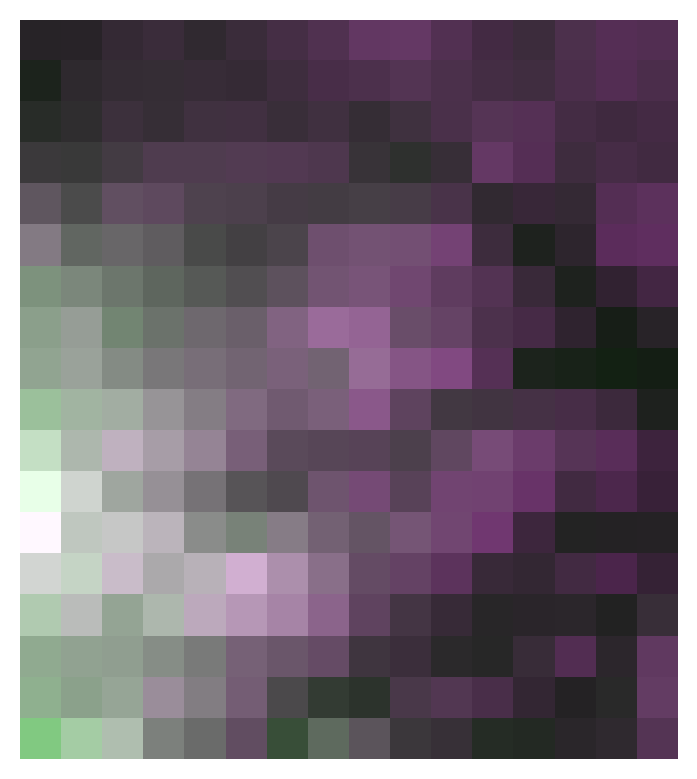

In [138]:
play_stimulus(undo_video_normalization(sample_batch[0][1]))

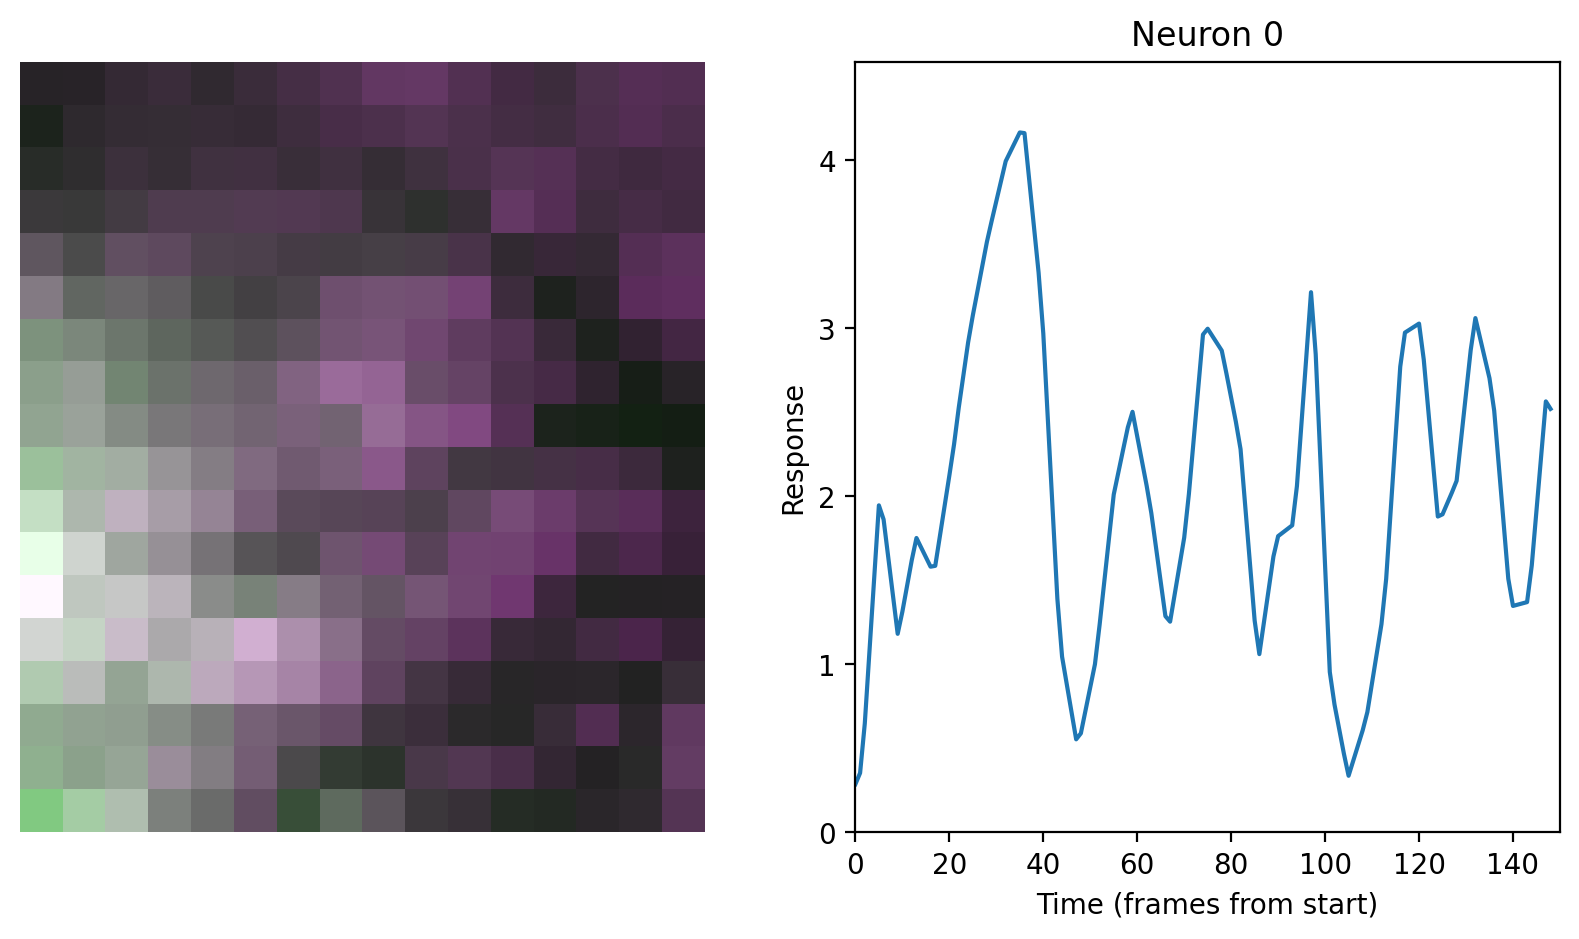

In [140]:
from openretina.plotting import play_sample_batch

play_sample_batch(undo_video_normalization(sample_batch[0][1]), sample_batch[1][1])

---